<a href="https://colab.research.google.com/github/Kanha02052002/DS-Notebooks/blob/main/Ghibli_Style_Ethics_Perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset Overview**
The dataset comprises AI-generated media content styled after Studio Ghibli, with metadata including
1. platform
2. file_size_kb
3. likes
4. comments
5. gpu_usage
6. style_accuracy_score
7. ethical_concerns_flag (*Yes* or *No*)

# Load Dataset from Drive

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Dataset-Colab/ai_ghibli_trend_dataset_v2.csv')

In [5]:
data.head(5)

,image_id,user_id,prompt,likes,shares,comments,platform,generation_time,gpu_usage,file_size_kb,resolution,style_accuracy_score,is_hand_edited,ethical_concerns_flag,creation_date,top_comment
0,77ce5c72-eb45-4651-bcb1-c0677c0fceaf,6a7adf3d,Studio Ghibli-inspired ocean with giant fish,916,410,555,Reddit,4.80,49,1684,1024x1024,89,Yes,Yes,2025-03-11,"So nostalgic, feels like childhood memories. 🎥..."
1,7d66c67f-0d11-4ef9-895c-d865ef11fe40,523b8706,Ghibli-style village at sunset,2965,1361,417,Reddit,11.11,81,2808,1024x1024,92,Yes,No,2025-03-11,Absolutely stunning! Love the details. 🎨 #5729
2,d7978afd-3932-4cce-9a21-5f9bf2bc1f64,0e02592a,A lone traveler exploring an enchanted ruin,4727,655,785,Instagram,5.56,41,1800,2048x2048,61,No,No,2025-03-06,Is this AI or hand-painted? Incredible! #8001
3,cb34636a-a15c-4b15-999c-759dbb8896fe,9ed78a42,Spirited Away-style bustling market street,1629,1954,212,TikTok,12.45,88,479,2048x2048,76,No,No,2025-03-23,Is this AI or hand-painted? Incredible! #5620
4,7511fbb8-db05-4584-a3a4-e8bb525ed58b,69ec8f02,Magical Ghibli forest with floating lanterns,2573,1281,913,TikTok,4.80,64,1789,512x512,58,No,Yes,2025-03-06,This looks straight out of a Ghibli movie! 🌟 #...


In [6]:
data.tail(5)

,image_id,user_id,prompt,likes,shares,comments,platform,generation_time,gpu_usage,file_size_kb,resolution,style_accuracy_score,is_hand_edited,ethical_concerns_flag,creation_date,top_comment
495,135267ba-3941-42ae-a421-3be20e3856d1,c80e6866,Anime-style train passing through a fantasy world,1634,1328,624,TikTok,10.56,73,3255,1024x1024,96,Yes,Yes,2025-03-20,I can't believe this is AI-generated! 😲 #3419
496,b2ced831-5b08-403d-bfb3-b562e256f359,81669630,Serene meadow with a tiny spirit creature,4198,833,812,Reddit,8.41,89,4710,1024x1024,83,Yes,No,2025-03-28,The lighting and atmosphere are perfect. 💡 #3348
497,8c87b8aa-b304-43cf-82b3-3a199367ec17,258613ea,Ghibli-style mountain with floating islands,1237,1703,530,Reddit,12.05,86,1545,2048x2048,81,Yes,No,2025-03-16,The lighting and atmosphere are perfect. 💡 #5209
498,04dba0f4-fdb7-4341-8bb6-dca5a595cd81,23b56439,"Cozy tea shop in a mystical town, Ghibli style",1852,1158,259,Twitter,5.86,56,2796,512x512,78,Yes,No,2025-03-01,Is this AI or hand-painted? Incredible! #1163
499,1960cd2d-0e99-4e09-b426-62212dd8b37f,7dea460a,Mysterious temple hidden in a magical forest,3944,1059,149,Twitter,5.81,35,1314,1024x1024,82,Yes,Yes,2025-03-18,I'd love to live in this world! #5615


In [7]:
len(data)

500

Checking missing values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image_id               500 non-null    object 
 1   user_id                500 non-null    object 
 2   prompt                 500 non-null    object 
 3   likes                  500 non-null    int64  
 4   shares                 500 non-null    int64  
 5   comments               500 non-null    int64  
 6   platform               500 non-null    object 
 7   generation_time        500 non-null    float64
 8   gpu_usage              500 non-null    int64  
 9   file_size_kb           500 non-null    int64  
 10  resolution             500 non-null    object 
 11  style_accuracy_score   500 non-null    int64  
 12  is_hand_edited         500 non-null    object 
 13  ethical_concerns_flag  500 non-null    object 
 14  creation_date          500 non-null    object 
 15  top_co

In [9]:
data.describe().loc[['mean','min','max']].T

,mean,min,max
likes,2601.26200,105.00,4944.00
shares,1040.18200,13.00,1999.00
comments,506.87200,5.00,998.00
generation_time,8.31778,1.54,14.99
gpu_usage,61.12400,30.00,90.00
file_size_kb,2511.82200,101.00,4973.00
style_accuracy_score,74.62600,50.00,100.00


# **Ethical Concern(seen or not)**

A *pie chart visualization* of the *ethical_concerns_flag* reveals the proportion of instances *flagged* for ethical concerns.

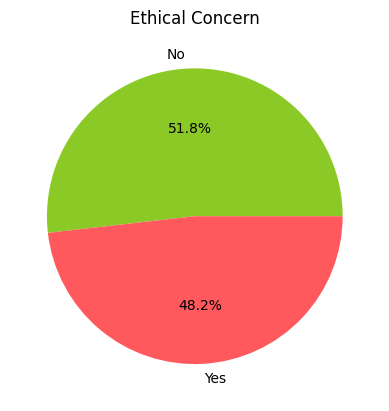

In [10]:
ethic = data['ethical_concerns_flag'].value_counts()
plt.pie(ethic.values,
        labels=ethic.index,
        autopct='%1.1f%%',
        colors=['#8AC926','#FF595E'])
plt.title('Ethical Concern')
plt.show()

Results shows that majority has no ethical concern for the given trend.

**Insight**: A significant share of the dataset is marked with ethical concern (Yes), indicating notable discourse or apprehension around AI-generated art, possibly relating to originality, consent, or cultural appropriation.

# **Ethical Concern(Platform)**
A grouped bar chart (Seaborn CountPlot) visualizes ethical concern frequency across different platforms.

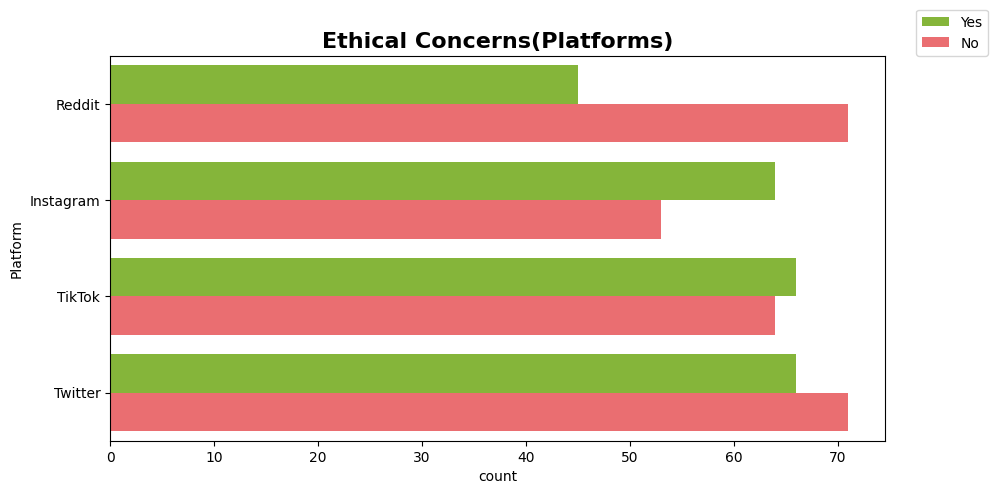

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(y="platform",
              hue="ethical_concerns_flag",
              data=data,
              palette=['#8AC926','#FF595E'])
plt.title("Ethical Concerns(Platforms)",
          fontsize=16,
          fontweight="bold")
plt.legend(loc=(1.04, 1)) # source - StackOverFlow
plt.ylabel("Platform")
plt.show()

More users from Reddit and X (aka Twitter) does not see ethical issue with this trend.

**Insight**: Certain platforms (e.g., Twitter aka X, Reddit) exhibit higher instances of flagged content, suggesting either platform-specific moderation policies or audience sensitivity.

# **Top 10 most liked prompts**

The top 10 prompts (based on likes) were extracted for deeper multivariate analysis.

A stacked horizontal bar chart was generated using file_size_kb, comments, gpu_usage, and style_accuracy_score.

In [12]:
df_reset = data.reset_index()
df_reset[["prompt", "platform", "likes"]].sort_values(by = 'likes', ascending=False).head(10)

,prompt,platform,likes
485,Ghibli-style mountain with floating islands,TikTok,4944
155,A lone traveler exploring an enchanted ruin,Twitter,4940
234,Anime-style train passing through a fantasy world,Twitter,4931
418,Anime-style train passing through a fantasy world,Instagram,4930
215,Ghibli-style night sky with glowing stars,Reddit,4928
428,Mysterious temple hidden in a magical forest,Twitter,4919
235,Mysterious temple hidden in a magical forest,Instagram,4918
29,Mysterious temple hidden in a magical forest,Reddit,4903
276,A lone traveler exploring an enchanted ruin,Reddit,4876
115,Studio Ghibli-inspired ocean with giant fish,TikTok,4861


List to top 10 most used prompts on various platforms based on most likes. \
**Many likes for "Mysterious temple hidden in a magical forest" on the 3 platform.**\
Creative ?




# 10 least liked prompt

In [13]:
df_reset[["prompt", "platform", "likes"]].sort_values(by = 'likes', ascending=True).head(10)

,prompt,platform,likes
398,Mysterious temple hidden in a magical forest,Twitter,105
206,Ghibli-style night sky with glowing stars,TikTok,138
184,Serene meadow with a tiny spirit creature,Reddit,154
354,"Cozy tea shop in a mystical town, Ghibli style",Reddit,175
30,Ghibli-style mountain with floating islands,TikTok,188
283,Serene meadow with a tiny spirit creature,Twitter,202
67,Ghibli-style village at sunset,Instagram,209
97,Ghibli-style night sky with glowing stars,Reddit,217
171,Serene meadow with a tiny spirit creature,Twitter,230
395,Ghibli-style night sky with glowing stars,Reddit,249


List to top 10 least used prompts on various platforms based on most likes. \
**Here again "Mysterious temple hidden in a magical forest" is least liked prompt ?**

In [15]:
top10= data.sort_values(by=['likes'], ascending=False).head(10)

In [16]:
top10

,image_id,user_id,prompt,likes,shares,comments,platform,generation_time,gpu_usage,file_size_kb,resolution,style_accuracy_score,is_hand_edited,ethical_concerns_flag,creation_date,top_comment
485,ae0e0a6e-3710-4f26-aad7-ee398dc1efe9,6de38855,Ghibli-style mountain with floating islands,4944,1480,625,TikTok,3.47,46,1862,2048x2048,97,Yes,Yes,2025-03-19,The colors are so soft and dreamy! ❤️ #7645
155,8b91bd81-cda5-43da-b611-556fdafba835,fe18b2dd,A lone traveler exploring an enchanted ruin,4940,120,971,Twitter,6.35,67,2877,1024x1024,63,No,No,2025-03-16,This looks straight out of a Ghibli movie! 🌟 #...
234,b236839a-be93-41ef-b36c-d17bee868825,efdef0c1,Anime-style train passing through a fantasy world,4931,271,614,Twitter,11.35,57,1724,1024x1024,69,No,Yes,2025-03-28,The lighting and atmosphere are perfect. 💡 #1126
418,04867651-33ad-473c-8df9-47ccdbcd9ae9,0490df24,Anime-style train passing through a fantasy world,4930,1113,307,Instagram,11.96,47,4679,1024x1024,70,Yes,Yes,2025-03-28,Is this AI or hand-painted? Incredible! #1333
215,506abead-9f6e-43a4-a635-61fc6680b587,3cace331,Ghibli-style night sky with glowing stars,4928,760,938,Reddit,2.42,70,1471,1024x1024,65,No,No,2025-03-31,This reminds me of Howl's Moving Castle! 🏰 #7007
428,505927d0-742f-4b64-bc7e-466788b32bc8,b71a5901,Mysterious temple hidden in a magical forest,4919,256,173,Twitter,3.94,64,2679,512x512,52,Yes,No,2025-03-05,This is giving me serious Spirited Away vibes!...
235,5427642c-b149-4f99-8df5-398d3db0e94f,e69bb362,Mysterious temple hidden in a magical forest,4918,1734,952,Instagram,14.40,65,1815,512x512,60,Yes,Yes,2025-03-26,This reminds me of Howl's Moving Castle! 🏰 #7061
29,dc151719-42df-4b8e-b9de-e0edf5e4da54,889f6004,Mysterious temple hidden in a magical forest,4903,1956,198,Reddit,7.35,85,1267,512x512,95,Yes,Yes,2025-03-14,This needs to be a real Ghibli film! #7651
276,eb7b384a-28f0-4c21-bd09-c3339013ac19,82a5d14c,A lone traveler exploring an enchanted ruin,4876,1720,37,Reddit,4.62,65,2833,1024x1024,85,Yes,No,2025-03-17,Is this AI or hand-painted? Incredible! #2693
115,76a53ada-12e3-4170-909f-13beb75c8002,95a2914b,Studio Ghibli-inspired ocean with giant fish,4861,966,471,TikTok,10.72,35,3511,512x512,65,No,Yes,2025-03-04,This reminds me of Howl's Moving Castle! 🏰 #5814


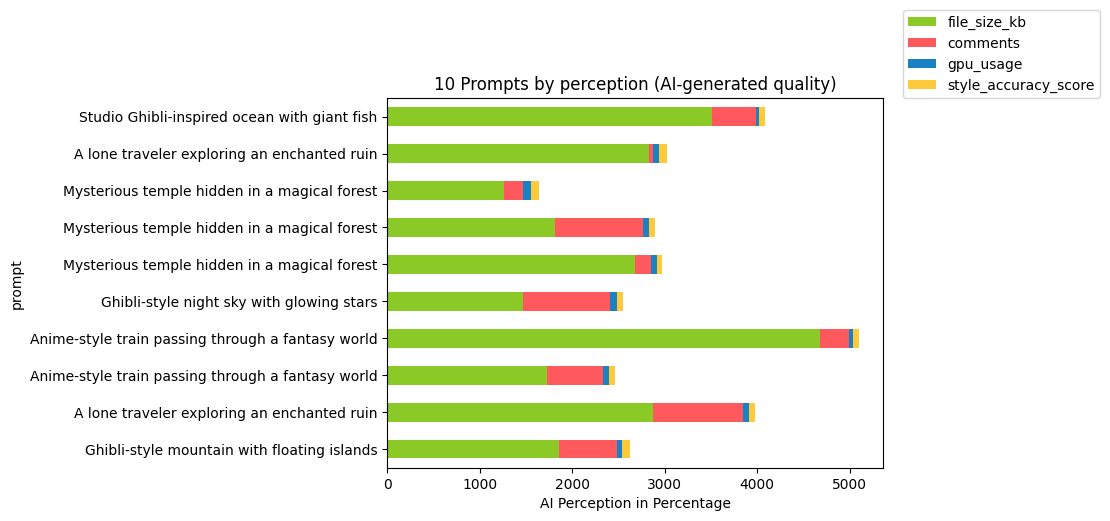

In [22]:
top10[['file_size_kb',
       'comments',
       'gpu_usage',
       'style_accuracy_score',
       'prompt']].plot.barh(x='prompt',stacked=True,color=['#8AC926','#FF595E','#1982C4','#FFCA3A'])

plt.legend(loc=(1.04, 1)) # source - StackOverFlow

# data.plot.barh(stacked=True)
plt.xlabel("AI Perception in Percentage")
plt.title('10 Prompts by perception (AI-generated quality)');

**Observation** \


1.   File size occupies majority part of the bar
2.   Comments represented by pink bar shows which prompt has more attention
3.   GPU usage and style accuracy score are of same size on all top prompt



**Another Insight**: High-performing prompts tend to have:
1. Moderate to high style_accuracy_score (indicating visually authentic Ghibli-style output)
2. Elevated gpu_usage (suggesting greater resource allocation)
3. Significant community interaction (comments)
4. Optimized file sizes for platform compatibility.

# **Textual Analysis**
A word cloud constructed from top_comment text identifies the most frequent lexical patterns.

**Insight**: Keywords emphasize stylistic appreciation (e.g., “beautiful,” “nostalgic”) and ethical reflection (e.g., “steal,” “original”), underscoring public sentiment and perception.

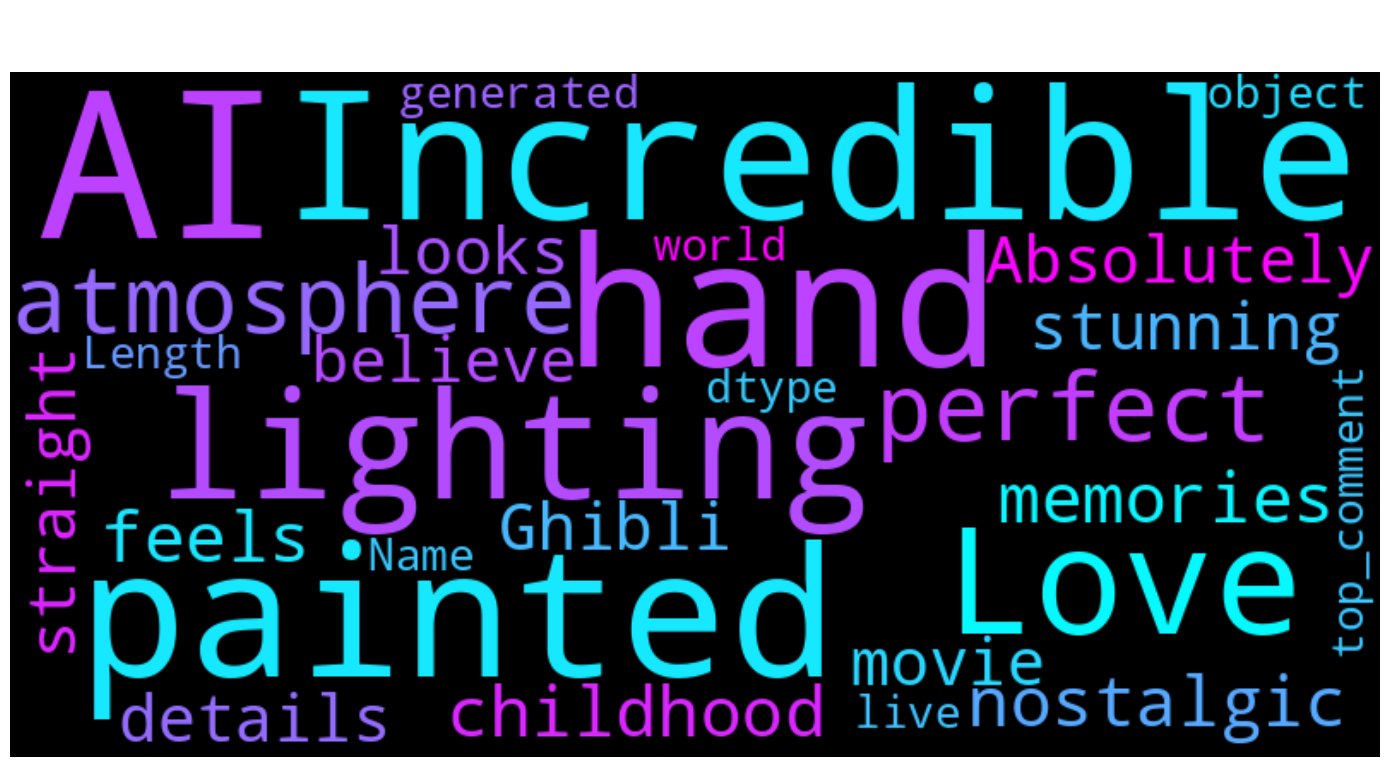

In [40]:
from wordcloud import WordCloud, STOPWORDS
def plot_wordcloud(text, mask=None, max_words=100, max_font_size=120, figure_size=(14.0,10.0),
                   title="Word Cloud", title_size=40, image_color=False, background_color="black"):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud(background_color=background_color,
                          stopwords=stopwords,
                          max_words=max_words,
                          max_font_size=max_font_size,
                          random_state=42,
                          width=800,
                          height=400,
                          mask=mask,
                          colormap='cool',
                          contour_width=1,
                          contour_color='white').generate(str(text))
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title, fontdict={'size': title_size, 'color': 'white', 'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_wordcloud(data["top_comment"], title="Top Comments")

# **Ethical Concern**

Filtered rows where ethical_concerns_flag == 'Yes' were explored to qualitatively assess controversial content.


**Taking Ethical concerns (YES), adding to this comments are so Positive.**\
I find it inconsistent, if you have concerns about something, your perspective and attitude are unlikely to be positive.

In [37]:
concerns = data[(data['ethical_concerns_flag']=='Yes')].reset_index(drop=True)
concerns.head(10)

,image_id,user_id,prompt,likes,shares,comments,platform,generation_time,gpu_usage,file_size_kb,resolution,style_accuracy_score,is_hand_edited,ethical_concerns_flag,creation_date,top_comment
0,77ce5c72-eb45-4651-bcb1-c0677c0fceaf,6a7adf3d,Studio Ghibli-inspired ocean with giant fish,916,410,555,Reddit,4.80,49,1684,1024x1024,89,Yes,Yes,2025-03-11,"So nostalgic, feels like childhood memories. 🎥..."
1,7511fbb8-db05-4584-a3a4-e8bb525ed58b,69ec8f02,Magical Ghibli forest with floating lanterns,2573,1281,913,TikTok,4.80,64,1789,512x512,58,No,Yes,2025-03-06,This looks straight out of a Ghibli movie! 🌟 #...
2,d2fd397c-b851-489e-a362-ea006b559c9d,175d9509,Ghibli-style village at sunset,3715,115,949,Twitter,5.47,86,2320,1024x1024,52,No,Yes,2025-03-03,"So nostalgic, feels like childhood memories. 🎥..."
3,d43335f2-b6a4-4af5-8a2f-b65dc56a9cfe,eb9d2412,Ghibli-style night sky with glowing stars,2163,1365,326,Reddit,11.85,61,1508,512x512,79,Yes,Yes,2025-03-21,I'd love to live in this world! #3940
4,070b7d25-3aff-4a40-9804-ca54edadda14,61bc80e6,"Cozy tea shop in a mystical town, Ghibli style",4764,1969,862,TikTok,6.01,49,2578,512x512,52,Yes,Yes,2025-03-27,The colors are so soft and dreamy! ❤️ #8917
5,48949c81-23da-433a-91b3-43d3cf648b6d,31133ea3,Magical Ghibli forest with floating lanterns,1279,1556,53,Reddit,13.85,31,4521,512x512,74,No,Yes,2025-03-13,This looks straight out of a Ghibli movie! 🌟 #...
6,46a3cb5e-e150-4948-9beb-3561c02b8c74,e9d56852,Ghibli-style night sky with glowing stars,2460,1996,152,Reddit,7.71,69,2667,2048x2048,53,No,Yes,2025-03-31,I can't believe this is AI-generated! 😲 #5149
7,e08aeae8-7e31-4bfc-b6c2-43713467538a,00db8335,Ghibli-style mountain with floating islands,3972,519,303,TikTok,14.78,66,1058,512x512,99,No,Yes,2025-03-09,AI art is getting too good! 🤖✨ #9509
8,5fb23dff-e3bd-4e28-aabf-9e3d3a3b20ab,7f5da1d0,Anime-style train passing through a fantasy world,744,420,178,Twitter,9.33,83,348,512x512,92,Yes,Yes,2025-03-30,This is giving me serious Spirited Away vibes!...
9,e3f7f27d-7175-44a2-93b2-9deca40503ec,a0bfb164,A lone traveler exploring an enchanted ruin,1413,84,306,Twitter,7.99,57,4471,512x512,98,Yes,Yes,2025-03-13,I'd love to live in this world! #2227



**Insight**: Prompts associated with ethically flagged content often imitate human artists or include sensitive themes. This supports concerns regarding intellectual property and moral implications in AI content generation.

In [36]:
data.iloc[499,15]

"I'd love to live in this world! #5615"

# **Summary of Key Insights**

1. A significant portion of AI-generated content is flagged for ethical concerns, with higher frequencies on certain platforms.
2. Ethical concern distribution varies across platforms, indicating differences in audience sensitivity and moderation policies.
3. Top-performing prompts show high engagement, efficient GPU usage, and strong style accuracy scores.
4. Comment sentiment reflects both appreciation for artistic quality and concern over ethical implications.
5. Perceived AI-generated quality is strongly correlated with user interaction metrics like likes and comments.


# **Conclusion**
The analysis reveals that while AI-generated Ghibli-style content garners high user engagement and visual appeal, it also raises notable ethical concerns—particularly around originality, consent, and platform-specific norms. Platforms play a crucial role in shaping how such content is received, with varied levels of sensitivity across communities. Prompts that balance stylistic fidelity with efficient resource usage tend to be more positively received, as reflected in their interaction metrics. Ultimately, the study underscores the importance of ethical considerations alongside technical excellence in the growing landscape of AI-generated art.

# Acknowledgements

Dataset by:\
**Laksika Tharmalingam** https://www.kaggle.com/datasets/uom190346a/ai-generated-ghibli-style-image-trends-2025/data \
Code and insights by: **Kanha Khantaal**